**Problem Statement**

property prices are influnced by multiple factors such as house location,age,and overall condition.accurately estimating property prices is more important buyers,sellers,real state companies,and financial institutions.

**Objectives**

*understand property price patterns
*Perform basic data processing

* Conduct minimal but meaningful Exploratory data analysis(EDA)

* Build regression-based machine learning models

* Evaluate model performance using regression metrics  

* identify key price-influncing features  










**Load Dataset**

In [1]:
from google.colab import files
upload=files.upload()

Saving train.csv to train.csv


In [2]:
import pandas as pd
df=pd.read_csv("train.csv")
df


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Filling duplicate values

In [3]:

duplicated=df.duplicated()
df.duplicated().sum()



np.int64(0)

In [4]:
#TO remove duplicates values
df.drop_duplicates(inplace=True)

**Graph 1:Price distribution**

Purpose:


* Understand price rsnge
* identify skewness and outliers

Graph:
Histogram-Property Price



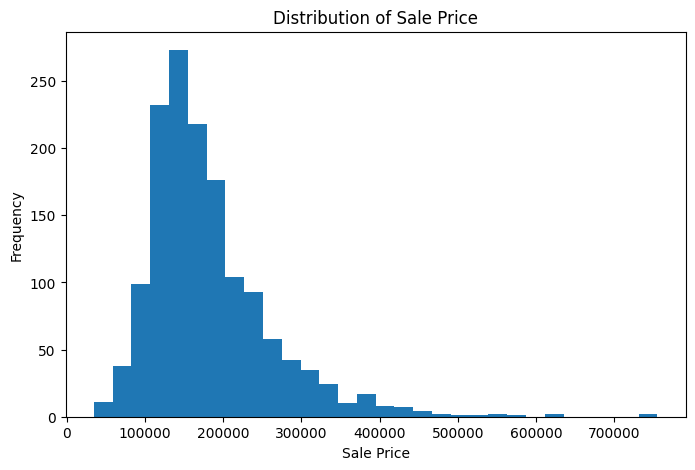

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df["SalePrice"], bins=30)
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.title("Distribution of Sale Price")
plt.show()


**Graph 2: house Size vs Price**

Purpose:
Analyze relationship between size and price

Graph:
Scatter plot

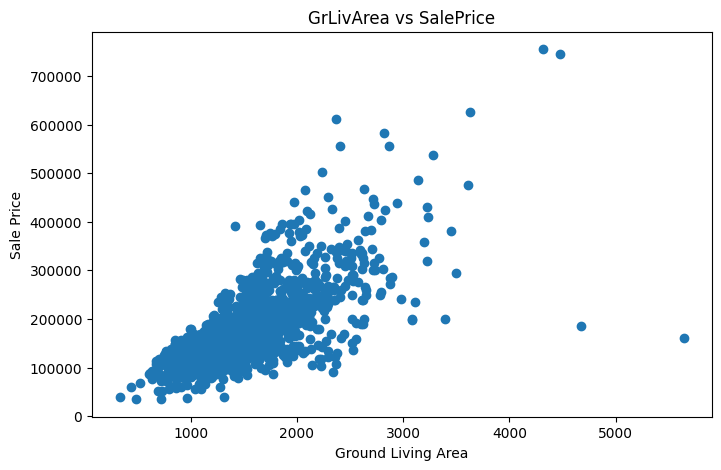

In [6]:
plt.figure(figsize=(8,5))
plt.scatter(df["GrLivArea"], df["SalePrice"])
plt.xlabel("Ground Living Area")
plt.ylabel("Sale Price")
plt.title("GrLivArea vs SalePrice")
plt.show()


**Graph 3:Price by Location**

Purpose:
Understand location-based price variation

Graph:
Box plot

<Figure size 800x500 with 0 Axes>

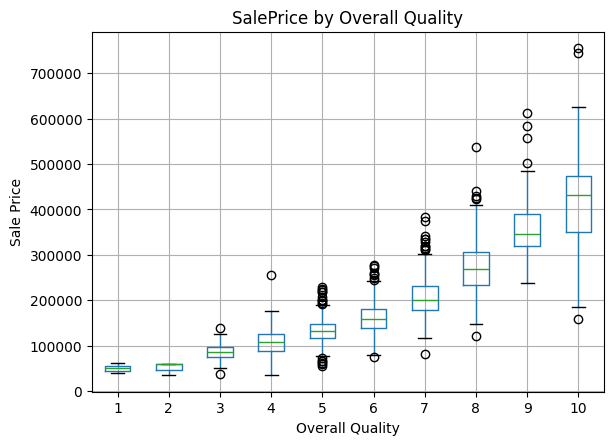

In [7]:
plt.figure(figsize=(8,5))
df.boxplot(column="SalePrice", by="OverallQual")
plt.title("SalePrice by Overall Quality")
plt.suptitle("")
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price")
plt.show()


**Graph 4:Property Age vs Price**

Purpose:
analyze effect of property age on price.

Graph:
Scatter plot

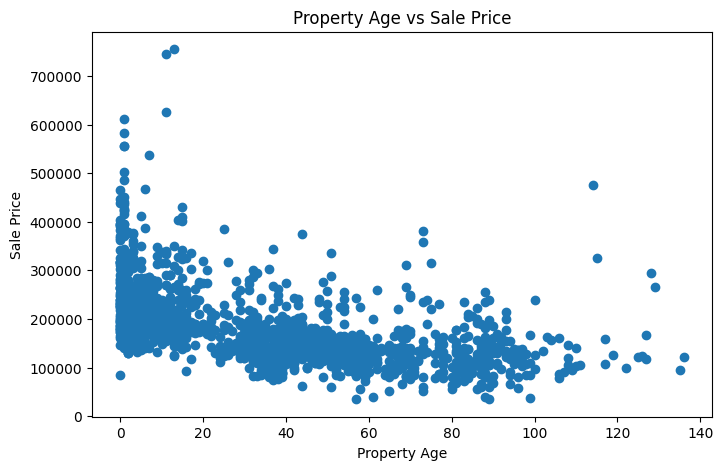

In [8]:
import matplotlib.pyplot as plt

# Create Property Age column (if not already created)
df["PropertyAge"] = df["YrSold"] - df["YearBuilt"]

# Scatter Plot: Property Age vs Sale Price
plt.figure(figsize=(8,5))
plt.scatter(df["PropertyAge"], df["SalePrice"])

plt.xlabel("Property Age")
plt.ylabel("Sale Price")
plt.title("Property Age vs Sale Price")

plt.show()


Checking missing values

In [9]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
YrSold,0
SaleType,0
SaleCondition,0
SalePrice,0


Handle the missing values

In [10]:
df = df.fillna(df.median(numeric_only=True))


Encode the categorical variables(Location,condition)

In [11]:
df = df.fillna(df.median(numeric_only=True))


Feature selection for important columns

In [12]:
X = df[["GrLivArea", "OverallQual", "TotalBsmtSF", "GarageArea", "YearBuilt"]]
y = df["SalePrice"]


Train Test Splitting the dataset

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Feature scaling

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


Model building linear regression

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [17]:
y_pred = model.predict(x_test)
df


Model building decision tree regression

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create model
dt_model = DecisionTreeRegressor(
    max_depth=5,
    random_state=42
)

# Train model
dt_model.fit(x_train, y_train)

# Prediction
dt_pred = dt_model.predict(x_test)

# Evaluation
print("Decision Tree Results")
print("MAE:", mean_absolute_error(y_test, dt_pred))
print("MSE:", mean_squared_error(y_test, dt_pred))
print("R2 Score:", r2_score(y_test, dt_pred))


Decision Tree Results
MAE: 25321.56506568726
MSE: 1408077417.7809248
R2 Score: 0.8164253540531887


Model building random forest regression

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create model
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=5,
    random_state=42
)

# Train model
rf_model.fit(x_train, y_train)

# Prediction
rf_pred = rf_model.predict(x_test)

# Evaluation
print("Random Forest Results")
print("MAE:", mean_absolute_error(y_test, rf_pred))
print("MSE:", mean_squared_error(y_test, rf_pred))
print("R2 Score:", r2_score(y_test, rf_pred))


Random Forest Results
MAE: 21765.83389631879
MSE: 1053020272.8786083
R2 Score: 0.8627150600333107


Model evaluation

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)


MAE: 24859.143745858157
MSE: 1576190976.0144458
R2 Score: 0.7945079604909699


**Graph :Actual vs Predicted Prices**

Purpose:
visually evaluate model prediction accuracy

Graph:
Scatter plot

**Graph 6:Feature Importance(Random Forest)**

Purpose:
Identify the most influential factors affecting property price

Graph:
Bar chart of feature importance

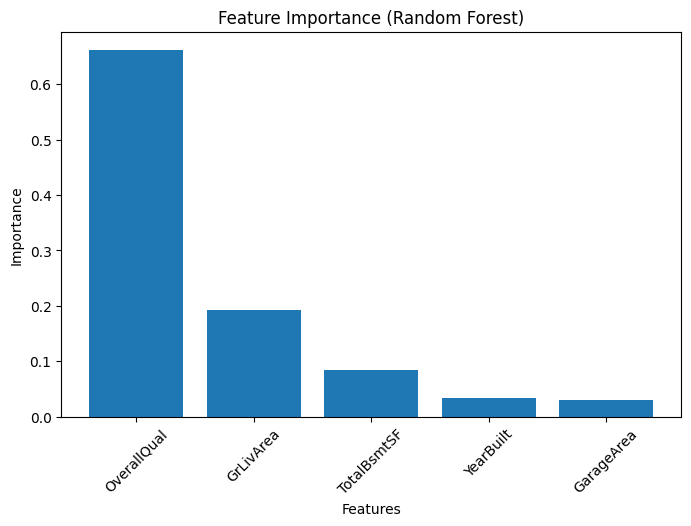

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importance from trained Random Forest Regressor
importances = rf_model.feature_importances_
features = X.columns   # same features used for training

# Create DataFrame and sort
feature_importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot Feature Importance Bar Chart
plt.figure(figsize=(8,5))
plt.bar(feature_importance_df["Feature"],
        feature_importance_df["Importance"])

plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance (Random Forest)")
plt.show()